Original Gray pixel values (50:60, 50:60):
 [[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 2 2 1 2]
 [1 1 1 1 1 1 2 2 1 2]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [0 1 1 1 1 1 2 1 1 1]
 [0 1 1 1 1 1 2 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]
Quantized (4 levels) pixel values:
 [[32 32 32 32 32 32 32 32 32 32]
 [32 32 32 32 32 32 32 32 32 32]
 [32 32 32 32 32 32 32 32 32 32]
 [32 32 32 32 32 32 32 32 32 32]
 [32 32 32 32 32 32 32 32 32 32]
 [32 32 32 32 32 32 32 32 32 32]
 [32 32 32 32 32 32 32 32 32 32]
 [32 32 32 32 32 32 32 32 32 32]
 [32 32 32 32 32 32 32 32 32 32]
 [32 32 32 32 32 32 32 32 32 32]]


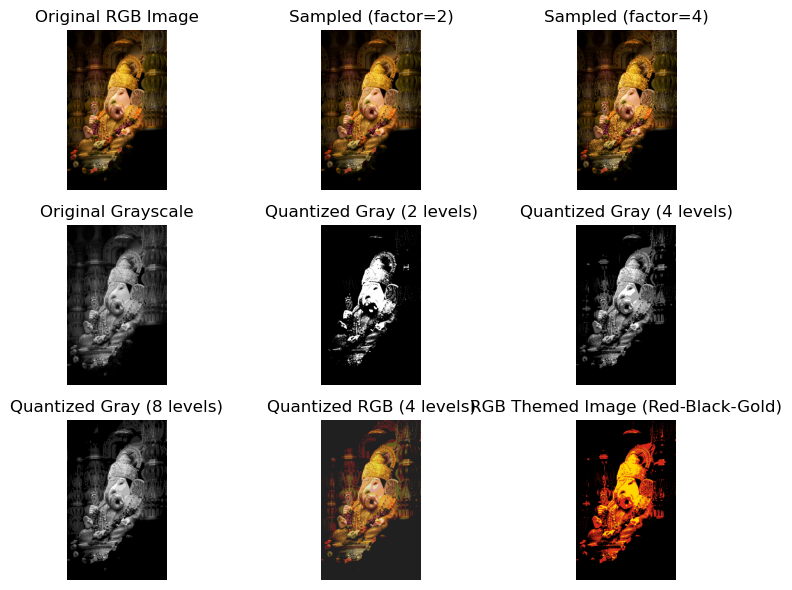

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_sampling(img, factor):
    sampled = img[::factor, ::factor]
    return sampled

def image_quantization(img, levels):
    step = 256 // levels
    quantized = (img // step) * step + step // 2
    return np.uint8(quantized)

def rcb_quantization(img):
    rcb_colors = np.array([
        [218, 41, 28],   # Red
        [0, 0, 0],       # Black
        [255, 215, 0]    # Gold
    ])
    
    pixels = img.reshape(-1, 3)
    
    distances = np.linalg.norm(pixels[:, None] - rcb_colors[None, :], axis=2)
    nearest_idx = np.argmin(distances, axis=1)
    
    rcb_img = rcb_colors[nearest_idx].reshape(img.shape)
    return np.uint8(rcb_img)


img = cv2.imread("C:/Users/dhira/Downloads/Bappa.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

sampled_2 = image_sampling(img, 2)
sampled_4 = image_sampling(img, 4)

quant_gray_2 = image_quantization(img_gray, 2)
quant_gray_4 = image_quantization(img_gray, 4)
quant_gray_8 = image_quantization(img_gray, 8)

quant_rgb_4 = image_quantization(img, 4)
quant_rgb_8 = image_quantization(img, 8)

rcb_img = rcb_quantization(img)

print("Original Gray pixel values (50:60, 50:60):\n", img_gray[50:60, 50:60])
print("Quantized (4 levels) pixel values:\n", quant_gray_4[50:60, 50:60])

# Increased width more (from 18 to 20) while keeping height at half (6)
plt.figure(figsize=(9, 6))

plt.subplot(3, 3, 1)
plt.imshow(img)
plt.title("Original RGB Image")
plt.axis("off")

# Sampling results
plt.subplot(3, 3, 2)
plt.imshow(sampled_2)
plt.title("Sampled (factor=2)")
plt.axis("off")

plt.subplot(3, 3, 3)
plt.imshow(sampled_4)
plt.title("Sampled (factor=4)")
plt.axis("off")

# Quantization (Grayscale)
plt.subplot(3, 3, 4)
plt.imshow(img_gray, cmap="gray")
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(3, 3, 5)
plt.imshow(quant_gray_2, cmap="gray")
plt.title("Quantized Gray (2 levels)")
plt.axis("off")

plt.subplot(3, 3, 6)
plt.imshow(quant_gray_4, cmap="gray")
plt.title("Quantized Gray (4 levels)")
plt.axis("off")

plt.subplot(3, 3, 7)
plt.imshow(quant_gray_8, cmap="gray")
plt.title("Quantized Gray (8 levels)")
plt.axis("off")

# Quantization (RGB)
plt.subplot(3, 3, 8)
plt.imshow(quant_rgb_4)
plt.title("Quantized RGB (4 levels)")
plt.axis("off")

plt.subplot(3, 3, 9)
plt.imshow(rcb_img)
plt.title("RGB Themed Image (Red-Black-Gold)")
plt.axis("off")

plt.tight_layout()
plt.show()